In [1]:
from tensorflow.keras import Sequential, layers
from tensorflow.keras.datasets import fashion_mnist

## Data Preparation

In [2]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


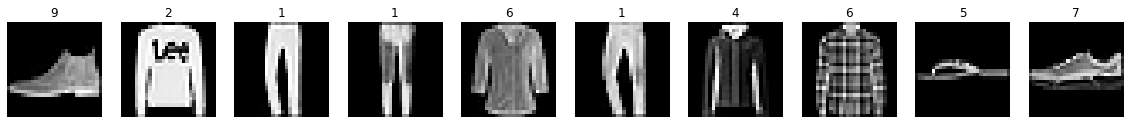

In [12]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 10, figsize=(20, 2))
for i, ax in enumerate(axes):
    ax.imshow(train_data[i], cmap='gray')
    ax.set_axis_off()
    ax.set_title(train_labels[i])

In [ ]:
# Normalization
train_data = train_data / 255.0
test_data = test_data / 255.0

## Model Design

In [35]:
train_data_v = train_data.reshape(len(train_data), 784)
test_data_v = test_data.reshape(len(test_data), 784)

In [42]:
train_data_v.shape

(60000, 784)

In [50]:
model = Sequential(
    [
     layers.Input(shape=(784,)),
     layers.Dense(128, activation='relu'),
     layers.Dense(10, activation='softmax')
    ]
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## Training

In [51]:
from tensorflow.keras import losses, optimizers

model.compile(loss=losses.sparse_categorical_crossentropy,
              optimizer=optimizers.Adam(),
              metrics=['accuracy'])

In [52]:
history = model.fit(train_data_v, train_labels,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 3s 6ms/step - loss: 9.6321 - accuracy: 0.7276 - val_loss: 1.7100 - val_accuracy: 0.7127
Epoch 2/20
375/375 [==============================] - 2s 5ms/step - loss: 1.0726 - accuracy: 0.7385 - val_loss: 0.8886 - val_accuracy: 0.7383
Epoch 3/20
375/375 [==============================] - 2s 5ms/step - loss: 0.7282 - accuracy: 0.7745 - val_loss: 0.7649 - val_accuracy: 0.7718
Epoch 4/20
375/375 [==============================] - 2s 5ms/step - loss: 0.5996 - accuracy: 0.7956 - val_loss: 0.6973 - val_accuracy: 0.8008
Epoch 5/20
375/375 [==============================] - 2s 5ms/step - loss: 0.5467 - accuracy: 0.8100 - val_loss: 0.6308 - val_accuracy: 0.8042
Epoch 6/20
375/375 [==============================] - 2s 5ms/step - loss: 0.5007 - accuracy: 0.8161 - val_loss: 0.6087 - val_accuracy: 0.8031
Epoch 7/20
375/375 [==============================] - 2s 5ms/step - loss: 0.4677 - accuracy: 0.8298 - val_loss: 0.5807 - val_accuracy: 0.8213
Epoch 

## Evaluation

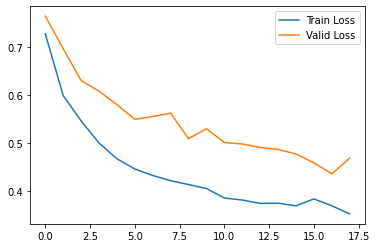

In [53]:
plt.plot(history.history['loss'][2:], label='Train Loss')
plt.plot(history.history['val_loss'][2:], label='Valid Loss')
plt.legend()

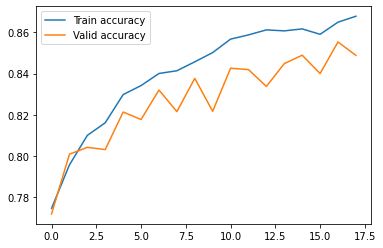

In [54]:
plt.plot(history.history['accuracy'][2:], label='Train accuracy')
plt.plot(history.history['val_accuracy'][2:], label='Valid accuracy')
plt.legend()

In [22]:
model.evaluate(test_data, test_labels)

313/313 [==============================] - 0s 2ms/step - loss: 0.4831 - accuracy: 0.8434


[0.48310571908950806, 0.8434000015258789]

In [23]:
preds = model.predict(test_data)

6
4


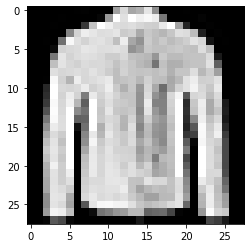

In [30]:
import numpy as np

print(np.argmax(preds[50]))
print(test_labels[50])

plt.imshow(test_data[50], cmap='gray')